In [6]:
import torch

In [7]:
d = torch.load('work_dirs/example_exp/ColorizeStable_gen.pth', map_location='cpu')
d2 = torch.load('keys.pth', map_location='cpu')

In [12]:
# list(d['model'].keys())
# # list(d2['model'].keys())

In [13]:
from collections import OrderedDict
new_d = OrderedDict()
for (k, v), (k1, v1) in zip(d['model'].items(), d2['model'].items()):
    new_d[k1] = v
torch.save({'model': new_d}, 'enc_mid_dec_post.pth')

In [8]:
from collections import OrderedDict
new_d = OrderedDict()

for k, v in d['model'].items():
    num = int(k.split('.')[1])
    if num <= 0:
        new_key = k.replace(f'layers.{num}.', f'layers_enc.{num}.')
    elif num <= 3:
        new_key = k.replace(f'layers.{num}.', f'layers_mid.{num-1}.')
    elif num <= 7:
        new_key = k.replace(f'layers.{num}.', f'layers_dec.{num-4}.')
    else:
        new_key = k.replace(f'layers.{num}.', f'layers_post.{num-8}.')
        
    new_d[new_key] = v
    
torch.save({'model': new_d}, 'enc_dec_post.pth')

In [15]:
type(d['model'])

collections.OrderedDict

In [9]:
import torch
d2 = torch.load('enc_dec_post.pth', map_location='cpu')

In [10]:
list(d2['model'].keys())

['layers_enc.0.0.weight',
 'layers_enc.0.1.weight',
 'layers_enc.0.1.bias',
 'layers_enc.0.1.running_mean',
 'layers_enc.0.1.running_var',
 'layers_enc.0.1.num_batches_tracked',
 'layers_enc.0.4.0.conv1.weight',
 'layers_enc.0.4.0.bn1.weight',
 'layers_enc.0.4.0.bn1.bias',
 'layers_enc.0.4.0.bn1.running_mean',
 'layers_enc.0.4.0.bn1.running_var',
 'layers_enc.0.4.0.bn1.num_batches_tracked',
 'layers_enc.0.4.0.conv2.weight',
 'layers_enc.0.4.0.bn2.weight',
 'layers_enc.0.4.0.bn2.bias',
 'layers_enc.0.4.0.bn2.running_mean',
 'layers_enc.0.4.0.bn2.running_var',
 'layers_enc.0.4.0.bn2.num_batches_tracked',
 'layers_enc.0.4.0.conv3.weight',
 'layers_enc.0.4.0.bn3.weight',
 'layers_enc.0.4.0.bn3.bias',
 'layers_enc.0.4.0.bn3.running_mean',
 'layers_enc.0.4.0.bn3.running_var',
 'layers_enc.0.4.0.bn3.num_batches_tracked',
 'layers_enc.0.4.0.downsample.0.weight',
 'layers_enc.0.4.0.downsample.1.weight',
 'layers_enc.0.4.0.downsample.1.bias',
 'layers_enc.0.4.0.downsample.1.running_mean',
 'laye

In [76]:
import torch
my_x = torch.load('my_x_0.pt', map_location='cpu')
my_x_1 = torch.load('my_x_1.pt', map_location='cpu')
his_x = torch.load('his_x_0.pt', map_location='cpu')

In [64]:
torch.mean(his_x)

tensor(33.7757)

In [67]:
# torch.mean(my_x)
torch.min(my_x - his_x)

tensor(-4.)

In [55]:
import numpy as np
false_num = np.array((my_x - his_x)> 3).astype(int)

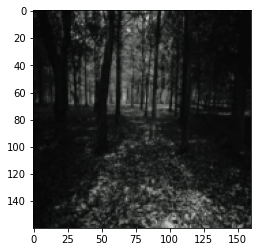

array([[[0.06666667, 0.05098039, 0.03529412, ..., 0.03137255,
         0.03137255, 0.03137255],
        [0.05882353, 0.05098039, 0.03529412, ..., 0.03137255,
         0.03137255, 0.03529412],
        [0.13725491, 0.07843138, 0.05882353, ..., 0.03137255,
         0.03137255, 0.03529412],
        ...,
        [0.03529412, 0.02745098, 0.03137255, ..., 0.2784314 ,
         0.23921569, 0.1764706 ],
        [0.03529412, 0.02745098, 0.03921569, ..., 0.17254902,
         0.13333334, 0.07058824],
        [0.08627451, 0.04313726, 0.04705882, ..., 0.14117648,
         0.09803922, 0.12156863]],

       [[0.06666667, 0.05098039, 0.03529412, ..., 0.03137255,
         0.03137255, 0.03137255],
        [0.05882353, 0.05098039, 0.03529412, ..., 0.03137255,
         0.03137255, 0.03529412],
        [0.13725491, 0.07843138, 0.05882353, ..., 0.03137255,
         0.03137255, 0.03529412],
        ...,
        [0.03529412, 0.02745098, 0.03137255, ..., 0.28627452,
         0.24705882, 0.18431373],
        [0.0

In [77]:
# from matplotlib import pyplot as plt 
# plt.imshow(my_x.numpy().transpose(1,2,0)/255)
# # plt.imshow((my_x - his_x)[0,::])
# plt.show()
# my_x.numpy()/255

from matplotlib import pyplot as plt 
plt.imshow(my_x_1.numpy().transpose(1,2,0))
# plt.imshow((my_x - his_x)[0,::])
plt.show()
my_x.numpy()/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


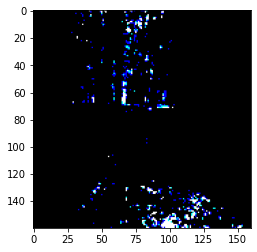

In [17]:
plt.imshow(his_x.numpy().transpose(1,2,0) * 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


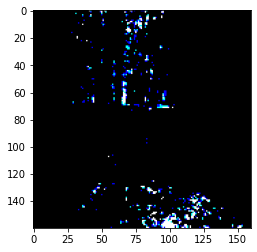

In [18]:
plt.imshow(my_x.numpy().transpose(1,2,0) * 255)